Make the data specific to male or female
- Load in the data using the pipeline

In [1]:
from importlib import reload 
import src.final_pipeline as f
import src.make_user_percentile_profile as m


reload(m)
reload(f)

#Load the intial data
long_key, questions, grading_Key,graded_df, meta = f.load_Graded_data()

# Load the dictionarys
keys2trait, Trait_dict_keys = f.create_k2t(long_key)

(153656, 300)


In [ ]:

#Number of questions for training
print("How many questions would you like (max) per trait")
max_depth = -1
while (max_depth < 0) or (max_depth > 15):
    max_depth = input('Enter a integer between 2 and 15: ')
    max_depth = int(max_depth)
    
# break
print('\n','-'*50,'\n')

#Identify the sex
sex = -1
while (sex != 'm') and (sex != 'f'):
    sex = input('Male (m) or Female (f)?')

if sex == 'm':
    nums = meta[meta.sex == '2'].number
elif sex == 'f':
    nums = meta[meta.sex == '1'].number
    
questions = questions.loc[nums,:]
    
# Train the Model
Trait_dict_questions = f.nested_dict(Trait_dict_keys,long_key)

percentile_df, traits_df = m.make_user_profiles(long_key,questions, grading_Key, keys2trait, Trait_dict_keys, Trait_dict_questions)

print('\n\nTraining Models!')
Traits,models = TrainModels.Train_models(traits_df,questions,max_depth)
print('\nModels are trained!')

How many questions would you like (max) per trait
Enter a integer between 2 and 15: 3

 -------------------------------------------------- 



In [11]:
from src import game as g
reload(g)

quiz = g.Quiz()
for i,model in enumerate(models):
    tree = model.tree_
    print(Traits[i])

    if i == 0:
        df,idk = quiz.play_game(model,long_key,questions,Traits[i])
    else:
        df,idk = quiz.play_game(model,long_key,questions,Traits[i],(True,df))
    #print(Traits[i])
    print('\n\n')

Openness
Hello, welcome to the quiz game!  Answer the following questions
        to better understand where you fall in the personality thing 

For each statement, rank the statement based on 1-5 scale
        

 1 = Very Innacurate and 5 = Very accurate


-------------------------------------------------- 




KeyboardInterrupt: 

/Users/elliottsaslow/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/Users/elliottsaslow/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


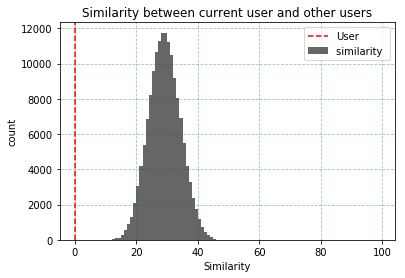

In [6]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse
import numpy as np
from numpy.random import rand
import random

from collections import Counter
import matplotlib.pyplot as plt

### Recommender System
#Get the Users ratings
uservals = quiz.df.loc[0,:]

#Look at what others answered to the same questions
everyone = questions[quiz.df.columns[uservals.nonzero()]]

#Find the difference between others and current user
everyone_abs = np.abs(everyone - uservals[quiz.df.columns[uservals.nonzero()]])

#sort the values based on the sum
ind = everyone_abs.sum(axis = 1).sort_values()[:10].index

#take the mean of the closest 10 users
percentile_df_user = percentile_df.loc[ind,:].mean(axis = 0)

plt.hist(everyone_abs.sum(axis = 1),
         bins = range(0,100),
         label = 'similarity ',
         color = 'k',
         alpha = .6)
plt.title('Similarity between current user and other users')
plt.ylabel('count')
plt.xlabel('Similarity')
plt.grid(alpha = .4,c= 'g',ls = '--')
plt.axvline(0,label = 'User',c = 'r',ls = '--')
plt.legend()
plt.show()

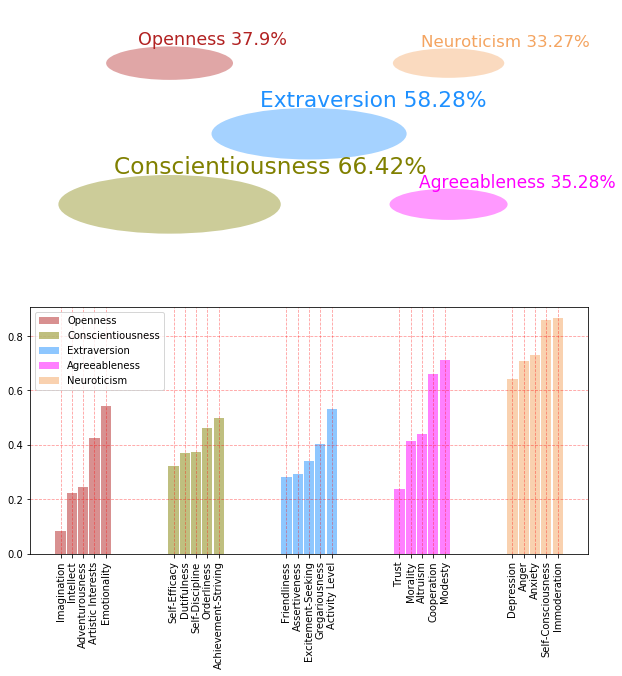

In [5]:
import src.plot_traits as pt
reload(pt)
trait_scores = np.array(quiz.Trait_score)/100

ax = pt.plot(trait_scores,percentile_df_user,keys2trait)
ax[0].axis('off');

------------

Older Stuff:

In [39]:
from src import unpickle 
from src import TrainModels
from importlib import reload
from sklearn import tree as t
import numpy as np
import src.game as g


long_key, questions, grading_Key,\
keys2trait, Trait_dict_keys, Trait_dict_questions,\
graded_df, percentile_df, traits_df= unpickle.Load_pickled_files()

In [2]:
def Train_models(max_depth = 3):
    Traits = ['Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism']
    models = []

    for i,trait in enumerate(Traits):
        y = traits_df[trait].values*100
        y = [int(x) for x in y]
        X = questions.values

        # train the model

        model,X_test,y_test = train_category.train_category(X,y,traits_df,max_depth)

        #export the tree
        t.export_graphviz(model,out_file='tree.dot') 
        print('\nModel: ',trait)
        error = np.round(np.mean(np.abs(model.predict(X_test)-y_test)),2)
        print('\nDone Training Model',i+1)
        print('--Remaining: ',len(Traits)- i-1,'--')
        print('Mean abs error: '+str(error)+'%','\n','-'*50)
        models.append(model)
    return Traits,models

In [3]:
reload(TrainModels)
print("How many questions would you like (max) per trait")
max_depth = -1
while (max_depth < 0) or (max_depth > 15):
    max_depth = input('Enter a integer between 2 and 15: ')
    max_depth = int(max_depth)


print('\n','-'*50,'\n')


print('\n\nTraining Models!')
Traits,models = TrainModels.Train_models(traits_df,questions,max_depth)
print('\nModels are trained!')

How many questions would you like (max) per trait
Enter a integer between 2 and 15: 4

 -------------------------------------------------- 



Training Models!

Model:  Openness

Done Training Model 1
--Remaining:  4 --
Mean abs error: 14.93% 
 --------------------------------------------------

Model:  Conscientiousness

Done Training Model 2
--Remaining:  3 --
Mean abs error: 12.96% 
 --------------------------------------------------

Model:  Extraversion

Done Training Model 3
--Remaining:  2 --
Mean abs error: 12.48% 
 --------------------------------------------------

Model:  Agreeableness

Done Training Model 4
--Remaining:  1 --
Mean abs error: 14.37% 
 --------------------------------------------------

Model:  Neuroticism

Done Training Model 5
--Remaining:  0 --
Mean abs error: 12.12% 
 --------------------------------------------------

Models are trained!


In [4]:
reload(g)

quiz = g.Quiz()
for i,model in enumerate(models):
    tree = model.tree_
    print(Traits[i])

    if i == 0:
        df,idk = quiz.play_game(model,long_key,questions,Traits[i])
    else:
        df,idk = quiz.play_game(model,long_key,questions,Traits[i],(True,df))
    print(Traits[i])
    print('\n\n')

Openness
Hello, welcome to the quiz game!  Answer the following questions
        to better understand where you fall in the personality thing 

For each statement, rank the statement based on 1-5 scale
        

 1 = Very Innacurate and 5 = Very accurate


-------------------------------------------------- 


Do not like art. 3
Have difficulty imagining things. 33
Answer needs to be an integer between 1 & 5
Have difficulty imagining things. 3
Am not interested in theoretical discussions. 3
See beauty in things that others might not notice. 2
Do not like poetry. 1
Like to begin new things. 2
Interested in many things. 4

You fall in the 9.049% percentile of this trait which correponds to node: 24
Openness



Conscientiousness
Have difficulty starting tasks. 2
Put little time and effort into my work. 1
Get chores done right away. 4
Carry out my plans. 2
Leave a mess in my room. 3
Do things according to a plan. 1
Don't see the consequences of things. 2
Work hard. 4

You fall in the 58.71

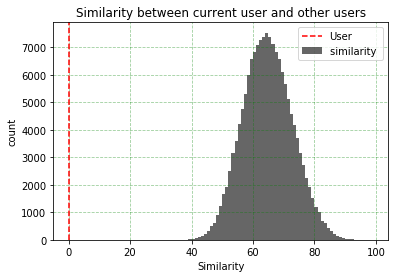

In [22]:
import matplotlib.pyplot as plt
import numpy.random as rnd
from matplotlib.patches import Ellipse
import numpy as np
from numpy.random import rand
import random

from collections import Counter
import matplotlib.pyplot as plt

### Recommender System
#Get the Users ratings
uservals = quiz.df.loc[0,:]

#Look at what others answered to the same questions
everyone = questions[quiz.df.columns[uservals.nonzero()]]

#Find the difference between others and current user
everyone_abs = np.abs(everyone - uservals[quiz.df.columns[uservals.nonzero()]])

#sort the values based on the sum
ind = everyone_abs.sum(axis = 1).sort_values()[:10].index

#take the mean of the closest 10 users
percentile_df_user = percentile_df.loc[ind,:].mean(axis = 0)

plt.hist(everyone_abs.sum(axis = 1),
         bins = range(0,100),
         label = 'similarity ',
         color = 'k',
         alpha = .6)
plt.title('Similarity between current user and other users')
plt.ylabel('count')
plt.xlabel('Similarity')
plt.grid(alpha = .4,c= 'g',ls = '--')
plt.axvline(0,label = 'User',c = 'r',ls = '--')
plt.legend()
plt.show()

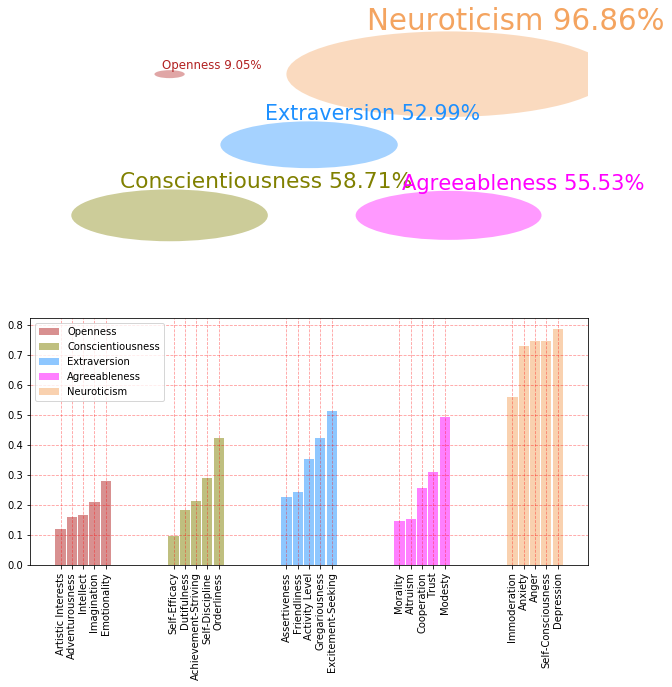

In [14]:
import src.plot_traits as pt
reload(pt)
trait_scores = np.array(quiz.Trait_score)/100

ax = pt.plot(trait_scores,percentile_df_user,keys2trait)
ax[0].axis('off');

[0.24952 0.22014 0.48352 0.20835 0.5067 ]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1142c4f98>,
      dtype=object)

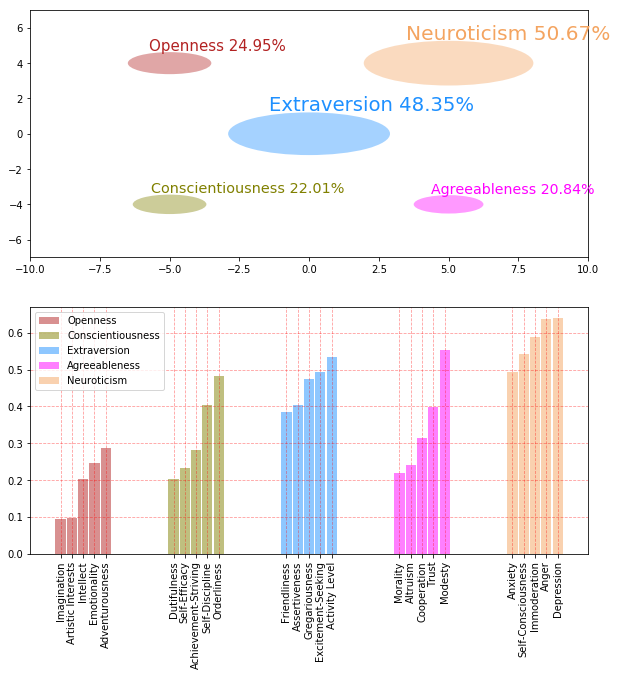

In [18]:

def plot(trait_scores,percentile_df_user):

    locs = [(-5,4),(-5,-4),(0,0),(5,-4),(5,4)]

    w_scaling = 12
    h_scaling = 5


    #Define the traits and the colors
    Traits = np.array(['Openness','Conscientiousness','Extraversion','Agreeableness','Neuroticism'])
    colors = ['firebrick','olive','dodgerblue','magenta','sandybrown']
    angles = [0,45,180,240,300]

    #create the Eclipses
    est = [Ellipse(xy=loc, width=trait*w_scaling, height=trait*h_scaling)
        for loc,trait in zip(locs,trait_scores)]

    #Create the figure
    _,ax = plt.subplots(2,1,figsize = (10,10))

    #Add each of the eclispses to the figure
    for color,e in zip(colors,est):
        ax[0].add_artist(e)
        e.set_clip_box(ax[0].bbox)
        e.set_alpha(.4)
        e.set_facecolor(color)

    #Set the X and Y axis up
    ax[0].set_xlim(-10, 10)
    ax[0].set_ylim(-7, 7)

    #Go through and add the trait to the graph
    for score, trait,loc,color in zip(trait_scores,Traits,locs,colors):

        #Change the Location a little
        loc2 = (loc[0]-score*w_scaling/4,loc[1]+score*h_scaling/2+.1)

        #Add the text
        ax[0].annotate(trait+' '+str(np.round(score*100,2))+'%',
                    xy=loc2,color = color,size=20*(score+1/2))
        count = 1

    print(trait_scores)

    final_x_ticks = []
    final_x_labels = []
    colors = ['firebrick','olive','dodgerblue','magenta','sandybrown']
    count = 0
    for trait in Traits:
        values = []
        names = []
        for bla in percentile_df_user.index:
            if (trait[0] in bla):
                values.append(percentile_df_user.loc[bla])
                names.append(keys2trait[bla.split('-')[1]][1])


        ind = np.argsort(values)
        values = np.array(values)[ind]
        names = np.array(names)[ind]
        bottom = 5*count
        top = bottom+5
        pos = list(range(bottom,top)) 
        width = .9
        ax[1].bar(pos, 
                #using 'openness data,
                values, 
                # of width
                width, 
                # with alpha 0.5
                alpha=0.5,
               color = colors[int(count/2)],
                 label = trait) 
        count +=2
        final_x_ticks.append(pos)
        final_x_labels.append(names)

    ax[1].set_xticks(np.ndarray.flatten(np.array(final_x_ticks)));
    ax[1].set_xticklabels(np.ndarray.flatten(np.array(final_x_labels)),rotation = 90);

    ax[1].grid(alpha = .4,ls = '--',color = 'r')
    ax[1].legend();
    return ax


plot(trait_scores,percentile_df_user)

[0.24952 0.22014 0.48352 0.20835 0.5067 ]


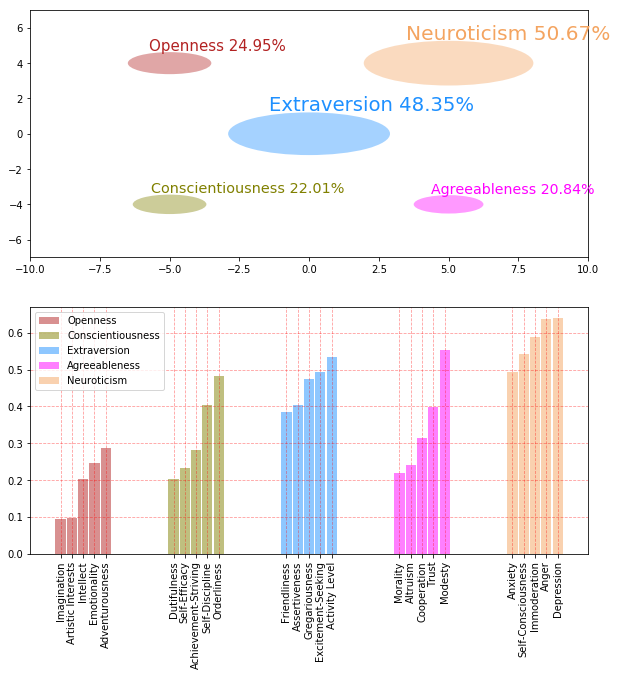